In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.shape

(768, 9)

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Display the number of null values in the dataset and the total count of it
#print(df.isna().sum())
data.isnull().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data =data.columns
data

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
print(type(data))

<class 'pandas.core.indexes.base.Index'>


In [17]:
data = data.to_frame()

In [18]:
print(data)

                                                 0
Pregnancies                            Pregnancies
Glucose                                    Glucose
BloodPressure                        BloodPressure
SkinThickness                        SkinThickness
Insulin                                    Insulin
BMI                                            BMI
DiabetesPedigreeFunction  DiabetesPedigreeFunction
Age                                            Age
Outcome                                    Outcome


In [19]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Figure size 500x300 with 0 Axes>

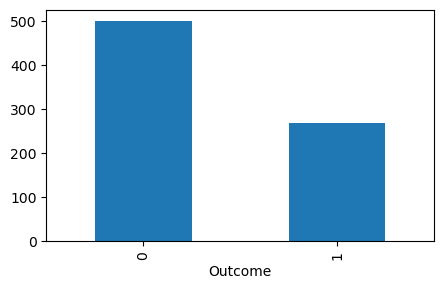

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
data['Outcome'].value_counts().plot(kind='bar')
plt.show()

In [20]:
X = data.iloc[:, 0:8]
Y = data.iloc[:, 8]

In [ ]:
#from sklearn.model_selection import train_test_split


In [22]:
#create training and testing variables
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [ ]:
#Training the model- using deep neural network

In [24]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Jtex\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(8,)),  # Define the input shape here
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
])

In [27]:
model = Sequential([
    Input(shape=(8,)),
    Dense(32, activation='relu'),
])

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           288 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288 (1.12 KB)

 Trainable params: 288 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Jtex\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 15)             │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272 (1.06 KB)

 Trainable params: 272 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting Model

In [34]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=100, batch_size=10)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6715 - loss: 9.0206 - val_accuracy: 0.4634 - val_loss: 2.3646
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4400 - loss: 1.4387 - val_accuracy: 0.4065 - val_loss: 0.7135
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3944 - loss: 0.7133 - val_accuracy: 0.6341 - val_loss: 0.6805
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6590 - loss: 0.6894 - val_accuracy: 0.6341 - val_loss: 0.6715
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6544 - loss: 0.6876 - val_accuracy: 0.6341 - val_loss: 0.6681
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6670 - loss: 0.6726 - val_accuracy: 0.6341 - val_loss: 0.6653
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6630 - loss: 0.6878 - val_accuracy: 0.6341 - val_loss: 0.6611
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6424 - loss: 0.6692 - val_accuracy: 0.6341 - v

In [ ]:
# Training history plots

In [35]:
result=pd.DataFrame(model.history.history)
result

,accuracy,loss,val_accuracy,val_loss
0,0.602851,7.341032,0.463415,2.364593
1,0.374745,1.113361,0.406504,0.713489
2,0.456212,0.712281,0.634146,0.680513
3,0.649695,0.689306,0.634146,0.671485
4,0.655804,0.680162,0.634146,0.668075
...,...,...,...,...
95,0.753564,0.517200,0.666667,0.704852
96,0.765784,0.521702,0.634146,0.674972
97,0.753564,0.520400,0.658537,0.661925
98,0.757638,0.517683,0.666667,0.669685


In [37]:
result.plot()

<Axes: >

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


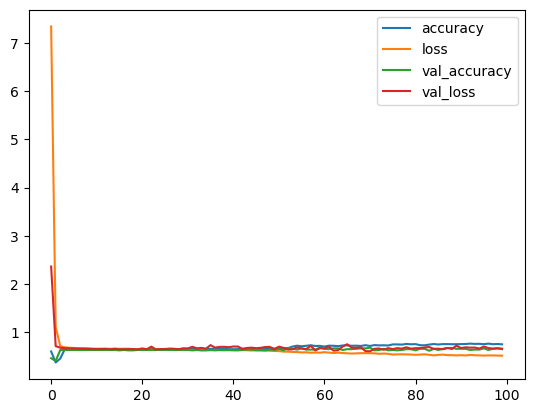

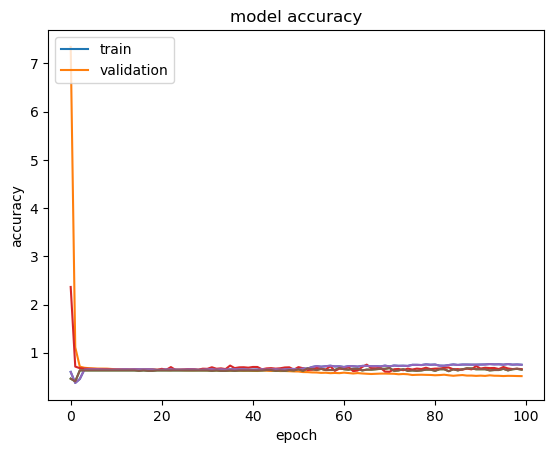

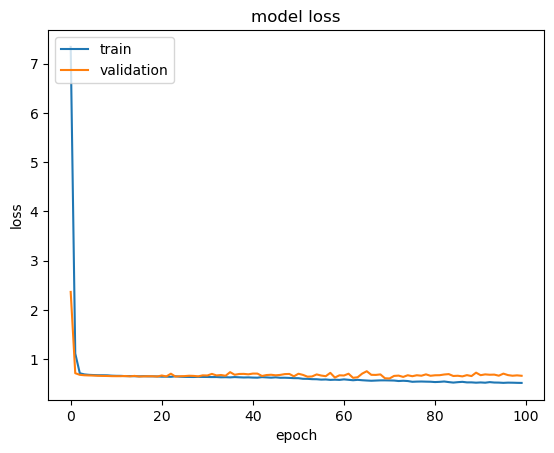

In [38]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
#train accuracy
_,accuracy = model.evaluate(X_train, Y_train)
print('Train Accuracy: %2f'%(accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7423 - loss: 0.5259 
Train Accuracy: 72.801304


In [40]:
#test accuracy
from sklearn.metrics import accuracy_score
Y_pred=(model.predict(X_test) > 0.5).astype("int32")

accuracy_score(Y_test, Y_pred)*100

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


68.18181818181817

In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       100
           1       0.60      0.28      0.38        54

    accuracy                           0.68       154
   macro avg       0.65      0.59      0.58       154
weighted avg       0.66      0.68      0.64       154



In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[90 10]
 [39 15]]


In [43]:
import seaborn as sns
sns.set(rc={'figure.figsize':(5,3)})
sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted outcome")
plt.ylabel("Actual  outcome") 

Text(29.75, 0.5, 'Actual  outcome')

In [ ]:
# Save and load

In [44]:
model.save("savemodel.keras")

In [45]:
from tensorflow.keras.models import load_model
# load model
model = load_model('savemodel.keras')
load_pred=(model.predict(X_test) > 0.5).astype("int32")

accuracy_score(Y_test, load_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


0.6818181818181818

In [ ]:
# Model check point and early stopping

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath = "bestcheckpoint.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=callbacks_list)

Epoch 1/100
31/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.4978
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to bestcheckpoint.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7509 - loss: 0.5049 - val_accuracy: 0.6667 - val_loss: 0.6597
Epoch 2/100
29/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7686 - loss: 0.5091 
Epoch 2: val_accuracy improved from 0.66667 to 0.67480, saving model to bestcheckpoint.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7566 - loss: 0.5147 - val_accuracy: 0.6748 - val_loss: 0.6694
Epoch 3/100
27/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7731 - loss: 0.4736 
Epoch 3: val_accuracy did not improve from 0.67480
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7608 - loss: 0.4865 - val_accuracy: 0.6179 - val_loss: 0.7839
Epoch 4/100
25/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8105 - loss: 0.4808 
Epoch 4: val_accuracy did not improve from 0.67480
50/50 ━━━━━━━━━━━━━━━━━━━━ 

In [47]:
from tensorflow.keras.models import load_model
# load model
model = load_model('bestcheckpoint.keras')
load_pred=(model.predict(X_test) > 0.5).astype("int32")

accuracy_score(Y_test, load_pred)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000024DE81D62A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


0.7272727272727273

In [48]:
filepath = "earlystopping.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_accuracy', patience=5)
callbacks_list = [checkpoint, es]
model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=callbacks_list)

Epoch 1/100
29/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.4796
Epoch 1: val_accuracy improved from -inf to 0.68293, saving model to earlystopping.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7740 - loss: 0.4821 - val_accuracy: 0.6829 - val_loss: 0.6449
Epoch 2/100
27/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7684 - loss: 0.4541 
Epoch 2: val_accuracy did not improve from 0.68293
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7647 - loss: 0.4650 - val_accuracy: 0.6748 - val_loss: 0.6570
Epoch 3/100
33/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7711 - loss: 0.4792 
Epoch 3: val_accuracy improved from 0.68293 to 0.69106, saving model to earlystopping.keras
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7729 - loss: 0.4831 - val_accuracy: 0.6911 - val_loss: 0.6508
Epoch 4/100
32/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7644 - loss: 0.4842 
Epoch 4: val_accuracy improved from 0.69106 to 0.69919, saving model to earlysto

In [49]:
from tensorflow.keras.models import load_model
# load model
model = load_model('earlystopping.keras')
load_pred=(model.predict(X_test) > 0.5).astype("int32")

accuracy_score(Y_test, load_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


0.7077922077922078

In [ ]:
# Compiling the model

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fitting the model

In [30]:
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=100, batch_size=10)

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 32)